In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from sklearn.cluster import KMeans


In [2]:
tickers = [
    'TCS.NS',
    'ITC.NS',
    'HDFCBANK.NS',
    'BHARTIARTL.NS',
    'ICICIBANK.NS',
    'INFY.NS',
    'SBIN.NS',
    'ITC.NS',
    'HINDUNILVR.NS',
    'HCLTECH.NS',
    'LT.NS',
    'BAJFINANCE.NS',
    'SUNPHARMA.NS',

    'M&M.NS',
    'KOTAKBANK.NS',
    'ULTRACEMCO.NS',
    'AXISBANK.NS',
    'NTPC.NS',
    'ONGC.NS',
    'WIPRO.NS',
    'TITAN.NS',
    'BEL.NS',
    'INDUSINDBK.NS',
    'JSWSTEEL.NS',
    'ADANIENT.NS',
    'HDFCLIFE.NS',
    'TATAMOTORS.NS',
    'HINDALCO.NS',
    'BAJAJ-AUTO.NS',
    'ASIANPAINT.NS',
    'MARICO.NS',
    'CIPLA.NS',
    'TATASTEEL.NS',
    'DRREDDY.NS',
    
    'GRASIM.NS',
    'TATAPOWER.NS',
    'BOSCHLTD.NS',
    'M&MFIN.NS',
    'TATACONSUM.NS',
    'NESTLEIND.NS',
    'ZEEL.NS',
    'HDFCAMC.NS',
    'TATACHEM.NS',
    'TECHM.NS',
    'APOLLOTYRE.NS',
    
    'TATAELXSI.NS',
    
]



In [3]:
# Fetch data

data = yf.download(tickers,start="2024-11-01",end = "2025-01-07",group_by="ticker")

# closing price only 
close_prices = pd.DataFrame({ticker:data[ticker]["Close"] for ticker in tickers})

df = close_prices

[*********************100%%**********************]  45 of 45 completed


In [4]:
df

TCS.NS      ITC.NS  HDFCBANK.NS  BHARTIARTL.NS  ICICIBANK.NS  \
Date                                                                            
2024-11-01  3984.199951  490.299988  1737.300049    1616.449951   1291.800049   
2024-11-04  3964.149902  484.600006  1714.099976    1591.250000   1277.199951   
2024-11-05  3971.350098  480.200012  1757.849976    1578.400024   1296.699951   
2024-11-06  4139.649902  481.100006  1755.250000    1598.800049   1302.349976   
2024-11-07  4150.899902  477.899994  1746.550049    1575.800049   1278.699951   
2024-11-08  4147.000000  478.049988  1754.449951    1569.900024   1258.849976   
2024-11-11  4198.700195  476.950012  1766.300049    1560.550049   1269.300049   
2024-11-12  4197.399902  472.850006  1718.199951    1555.650024   1270.599976   
2024-11-13  4150.350098  472.200012  1681.349976    1550.449951   1253.699951   
2024-11-14  4145.899902  465.950012  1692.750000    1550.500000   1256.949951   
2024-11-18  4019.500000  466.549988  1705.099976    1537.000000   1253.449951   
2024-11-19  4039.550049  467.350006  1742.250000    1525.500000   1249.099976   
2024-11-21  4072.850098  457.149994  1741.199951    1525.150024   1250.550049   
2024-11-22  4244.600098  474.649994  1745.599976    1569.300049   1278.050049   
2024-11-25  4315.100098  476.799988  1785.599976    1578.750000   1300.949951   
2024-11-26  4352.700195  477.000000  1785.550049    1577.250000   1304.949951   
2024-11-27  4332.549805  476.950012  1812.300049    1577.650024   1300.699951   
2024-11-28  4244.899902  474.899994  1793.150024    1560.400024   1286.349976   
2024-11-29  4270.850098  476.750000  1796.050049    1627.150024   1300.099976   
2024-12-02  4276.649902  477.200012  1804.699951    1643.599976   1304.650024   
2024-12-03  4302.750000  472.549988  1826.300049    1620.550049   1308.400024   
2024-12-04  4354.399902  467.100006  1860.099976    1584.099976   1316.050049   
2024-12-05  4464.049805  467.500000  1865.750000    1615.349976   1336.500000   
2024-12-06  4445.500000  471.149994  1855.849976    1597.849976   1328.750000   
2024-12-09  4452.149902  464.950012  1870.000000    1602.550049   1322.300049   
2024-12-10  4432.549805  465.450012  1868.099976    1578.650024   1330.449951   
2024-12-11  4427.450195  465.250000  1863.099976    1586.000000   1327.500000   
2024-12-12  4454.950195  460.600006  1859.250000    1610.550049   1329.250000   
2024-12-13  4473.899902  470.000000  1871.750000    1681.750000   1344.900024   
2024-12-16  4415.200195  470.100006  1865.199951    1662.550049   1346.099976   
2024-12-17  4328.500000  469.549988  1833.250000    1615.300049   1333.750000   
2024-12-18  4347.850098  470.500000  1810.699951    1601.900024   1314.150024   
2024-12-19  4271.899902  466.549988  1793.500000    1600.300049   1286.900024   
2024-12-20  4170.299805  464.649994  1771.500000    1578.099976   1288.400024   
2024-12-23  4158.299805  474.250000  1801.000000    1586.900024   1296.800049   
2024-12-24  4179.500000  478.450012  1798.099976    1583.900024   1297.250000   
2024-12-26  4169.100098  476.950012  1790.750000    1599.500000   1297.349976   
2024-12-27  4164.850098  478.600006  1798.250000    1599.849976   1307.550049   
2024-12-30  4158.799805  477.000000  1777.900024    1586.900024   1294.650024   
2024-12-31  4094.800049  483.649994  1772.849976    1587.750000   1281.650024   
2025-01-01  4112.450195  483.950012  1782.750000    1595.699951   1283.650024   
2025-01-02  4175.750000  489.049988  1793.750000    1609.699951   1290.599976   
2025-01-03  4099.899902  481.600006  1749.199951    1598.849976   1265.050049   
2025-01-06  4095.000000  442.649994  1710.500000    1588.449951   1264.099976   

                INFY.NS     SBIN.NS  HINDUNILVR.NS   HCLTECH.NS        LT.NS  \
Date                                                                           
2024-11-01  1760.849976  821.200012    2537.500000  1757.400024  3626.350098   
2024-11-04  1763.650024  829.849976    2524.800049

In [15]:
df.shape

(44, 45)

In [16]:
df.dtypes

TCS.NS           float64
ITC.NS           float64
HDFCBANK.NS      float64
BHARTIARTL.NS    float64
ICICIBANK.NS     float64
INFY.NS          float64
SBIN.NS          float64
HINDUNILVR.NS    float64
HCLTECH.NS       float64
LT.NS            float64
BAJFINANCE.NS    float64
SUNPHARMA.NS     float64
M&M.NS           float64
KOTAKBANK.NS     float64
ULTRACEMCO.NS    float64
AXISBANK.NS      float64
NTPC.NS          float64
ONGC.NS          float64
WIPRO.NS         float64
TITAN.NS         float64
BEL.NS           float64
INDUSINDBK.NS    float64
JSWSTEEL.NS      float64
ADANIENT.NS      float64
HDFCLIFE.NS      float64
TATAMOTORS.NS    float64
HINDALCO.NS      float64
BAJAJ-AUTO.NS    float64
ASIANPAINT.NS    float64
MARICO.NS        float64
CIPLA.NS         float64
TATASTEEL.NS     float64
DRREDDY.NS       float64
GRASIM.NS        float64
TATAPOWER.NS     float64
BOSCHLTD.NS      float64
M&MFIN.NS        float64
TATACONSUM.NS    float64
NESTLEIND.NS     float64
ZEEL.NS          float64


In [5]:
df.describe()

TCS.NS      ITC.NS  HDFCBANK.NS  BHARTIARTL.NS  ICICIBANK.NS  \
count    44.000000   44.000000    44.000000      44.000000     44.000000   
mean   4226.562494  473.123865  1786.931813    1589.602281   1294.932953   
std     144.042075    8.635201    52.344954      31.146952     26.398754   
min    3964.149902  442.649994  1681.349976    1525.150024   1249.099976   
25%    4144.337402  467.287506  1748.537476    1576.887512   1277.837524   
50%    4188.449951  474.449997  1788.174988    1587.325012   1296.750000   
75%    4336.374878  477.937492  1815.800049    1602.062531   1309.837524   
max    4473.899902  490.299988  1871.750000    1681.750000   1346.099976   

           INFY.NS     SBIN.NS  HINDUNILVR.NS   HCLTECH.NS        LT.NS  ...  \
count    44.000000   44.000000      44.000000    44.000000    44.000000  ...   
mean   1894.060231  830.082959    2421.512501  1889.767045  3689.859092  ...   
std      61.537235   25.980923      65.809628    53.034349   120.096898  ...   
min    1754.199951  776.400024    2322.100098  1757.400024  3483.500000  ...   
25%    1859.537476  811.162506    2362.400024  1856.224976  3606.612427  ...   
50%    1904.125000  835.250000    2408.300049  1898.025024  3660.099976  ...   
75%    1935.599976  853.762512    2480.112488  1929.437469  3765.374939  ...   
max    1999.699951  867.500000    2537.500000  1972.199951  3947.300049  ...   

        BOSCHLTD.NS   M&MFIN.NS  TATACONSUM.NS  NESTLEIND.NS     ZEEL.NS  \
count     44.000000   44.000000      44.000000     44.000000   44.000000   
mean   34931.957919  271.493179     942.153410   2225.053406  126.696136   
std      904.046126    7.850881      31.467175     41.625393    7.965185   
min    33212.000000  256.250000     889.450012   2149.899902  114.900002   
25%    34237.688477  265.512489     916.537521   2187.287537  121.402502   
50%    34947.173828  272.199997     937.250000   2234.949951  124.340000   
75%    35651.525391  276.787498     961.787506   2258.775024  131.957497   
max    36499.000000  286.250000    1007.049988   2295.649902  143.589996   

        HDFCAMC.NS  TATACHEM.NS     TECHM.NS  APOLLOTYRE.NS  TATAELXSI.NS  
count    44.000000    44.000000    44.000000      44.000000     44.000000  
mean   4321.830677  1083.468190  1720.165913     514.739772   6923.009089  
std     118.737383    39.334762    45.994347      25.029111    313.018336  
min    4104.950195   991.250000  1603.650024     456.600006   6374.549805  
25%    4235.000122  1055.912506  1688.962463     494.012497   6696.625000  
50%    4280.350098  1083.349976  1712.350037     520.700012   6898.475098  
75%    4401.875000  1119.687500  1757.500031     535.262497   7230.999878  
max    4543.850098  1154.750000  1796.400024     549.099976   7403.149902  

[8 rows x 45 columns]

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 44 entries, 2024-11-01 to 2025-01-06
Data columns (total 45 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   TCS.NS         44 non-null     float64
 1   ITC.NS         44 non-null     float64
 2   HDFCBANK.NS    44 non-null     float64
 3   BHARTIARTL.NS  44 non-null     float64
 4   ICICIBANK.NS   44 non-null     float64
 5   INFY.NS        44 non-null     float64
 6   SBIN.NS        44 non-null     float64
 7   HINDUNILVR.NS  44 non-null     float64
 8   HCLTECH.NS     44 non-null     float64
 9   LT.NS          44 non-null     float64
 10  BAJFINANCE.NS  44 non-null     float64
 11  SUNPHARMA.NS   44 non-null     float64
 12  M&M.NS         44 non-null     float64
 13  KOTAKBANK.NS   44 non-null     float64
 14  ULTRACEMCO.NS  44 non-null     float64
 15  AXISBANK.NS    44 non-null     float64
 16  NTPC.NS        44 non-null     float64
 17  ONGC.NS        44 non-null     float

In [8]:
df.duplicated()

Date
2024-11-01    False
2024-11-04    False
2024-11-05    False
2024-11-06    False
2024-11-07    False
2024-11-08    False
2024-11-11    False
2024-11-12    False
2024-11-13    False
2024-11-14    False
2024-11-18    False
2024-11-19    False
2024-11-21    False
2024-11-22    False
2024-11-25    False
2024-11-26    False
2024-11-27    False
2024-11-28    False
2024-11-29    False
2024-12-02    False
2024-12-03    False
2024-12-04    False
2024-12-05    False
2024-12-06    False
2024-12-09    False
2024-12-10    False
2024-12-11    False
2024-12-12    False
2024-12-13    False
2024-12-16    False
2024-12-17    False
2024-12-18    False
2024-12-19    False
2024-12-20    False
2024-12-23    False
2024-12-24    False
2024-12-26    False
2024-12-27    False
2024-12-30    False
2024-12-31    False
2025-01-01    False
2025-01-02    False
2025-01-03    False
2025-01-06    False
dtype: bool

In [9]:
df.isnull().sum()

TCS.NS           0
ITC.NS           0
HDFCBANK.NS      0
BHARTIARTL.NS    0
ICICIBANK.NS     0
INFY.NS          0
SBIN.NS          0
HINDUNILVR.NS    0
HCLTECH.NS       0
LT.NS            0
BAJFINANCE.NS    0
SUNPHARMA.NS     0
M&M.NS           0
KOTAKBANK.NS     0
ULTRACEMCO.NS    0
AXISBANK.NS      0
NTPC.NS          0
ONGC.NS          0
WIPRO.NS         0
TITAN.NS         0
BEL.NS           0
INDUSINDBK.NS    0
JSWSTEEL.NS      0
ADANIENT.NS      0
HDFCLIFE.NS      0
TATAMOTORS.NS    0
HINDALCO.NS      0
BAJAJ-AUTO.NS    0
ASIANPAINT.NS    0
MARICO.NS        0
CIPLA.NS         0
TATASTEEL.NS     0
DRREDDY.NS       0
GRASIM.NS        0
TATAPOWER.NS     0
BOSCHLTD.NS      0
M&MFIN.NS        0
TATACONSUM.NS    0
NESTLEIND.NS     0
ZEEL.NS          0
HDFCAMC.NS       0
TATACHEM.NS      0
TECHM.NS         0
APOLLOTYRE.NS    0
TATAELXSI.NS     0
dtype: int64

In [10]:
df.nunique()

TCS.NS           44
ITC.NS           40
HDFCBANK.NS      44
BHARTIARTL.NS    43
ICICIBANK.NS     44
INFY.NS          44
SBIN.NS          44
HINDUNILVR.NS    44
HCLTECH.NS       44
LT.NS            44
BAJFINANCE.NS    44
SUNPHARMA.NS     43
M&M.NS           44
KOTAKBANK.NS     43
ULTRACEMCO.NS    44
AXISBANK.NS      43
NTPC.NS          41
ONGC.NS          42
WIPRO.NS         42
TITAN.NS         44
BEL.NS           44
INDUSINDBK.NS    43
JSWSTEEL.NS      43
ADANIENT.NS      44
HDFCLIFE.NS      44
TATAMOTORS.NS    44
HINDALCO.NS      44
BAJAJ-AUTO.NS    44
ASIANPAINT.NS    43
MARICO.NS        43
CIPLA.NS         43
TATASTEEL.NS     44
DRREDDY.NS       44
GRASIM.NS        44
TATAPOWER.NS     43
BOSCHLTD.NS      44
M&MFIN.NS        43
TATACONSUM.NS    44
NESTLEIND.NS     44
ZEEL.NS          44
HDFCAMC.NS       44
TATACHEM.NS      43
TECHM.NS         44
APOLLOTYRE.NS    44
TATAELXSI.NS     44
dtype: int64

In [14]:
save_file = df.to_csv("stockdata.csv",index=False)
print("File stockdata.csv was succesfully save")

File stockdata.csv was succesfully save


## Extract the latest stock prices (last row) and corresponding stock names

In [15]:
latest_prices = df.iloc[-1]

stock_name = latest_prices.index
stock_prices = latest_prices.values

- Create a DataFrame for better handling

In [17]:
scatter_data = pd.DataFrame({"Stock":stock_name,"Price":stock_prices})

In [21]:
scatter_data.head()

Stock        Price
0         TCS.NS  4095.000000
1         ITC.NS   442.649994
2    HDFCBANK.NS  1710.500000
3  BHARTIARTL.NS  1588.449951
4   ICICIBANK.NS  1264.099976

- Sort the data by price in descending order for top 5 high-price stocks

In [27]:
top_high_price_stocks = scatter_data.sort_values(by='Price', ascending=False).head(10)

In [28]:
top_high_price_stocks

Stock         Price
35    BOSCHLTD.NS  33471.101562
14  ULTRACEMCO.NS  11503.599609
27  BAJAJ-AUTO.NS   8823.849609
10  BAJFINANCE.NS   7349.350098
44   TATAELXSI.NS   6486.450195
40     HDFCAMC.NS   4104.950195
0          TCS.NS   4095.000000
9           LT.NS   3603.199951
19       TITAN.NS   3470.399902
12         M&M.NS   3105.699951

-  Sort the data by price in ascending order for top 5 low-price stocks

In [30]:
top_low_price_stocks = scatter_data.sort_values(by='Price',ascending=True).head(10)

In [31]:
top_low_price_stocks

Stock       Price
39        ZEEL.NS  122.559998
31   TATASTEEL.NS  132.179993
17        ONGC.NS  254.360001
36      M&MFIN.NS  271.000000
20         BEL.NS  282.149994
18       WIPRO.NS  294.299988
16        NTPC.NS  327.500000
34   TATAPOWER.NS  378.649994
1          ITC.NS  442.649994
43  APOLLOTYRE.NS  500.750000

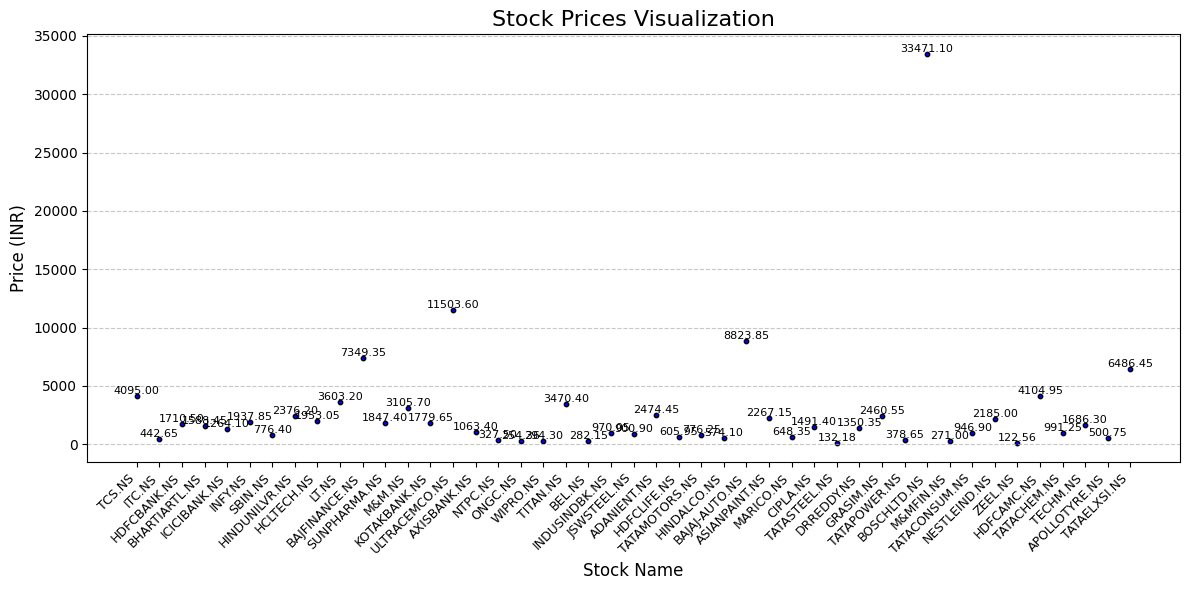

In [48]:

# Plotting the scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(scatter_data['Stock'], scatter_data['Price'], color='blue', edgecolor='black', s=10)

# Adding annotations for each point
for i, row in scatter_data.iterrows():
    plt.text(i, row['Price'], f"{row['Price']:.2f}", ha='center', va='bottom', fontsize=8)

# Customize the plot
plt.title('Stock Prices Visualization', fontsize=16)
plt.xlabel('Stock Name', fontsize=12)
plt.ylabel('Price (INR)', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=9)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


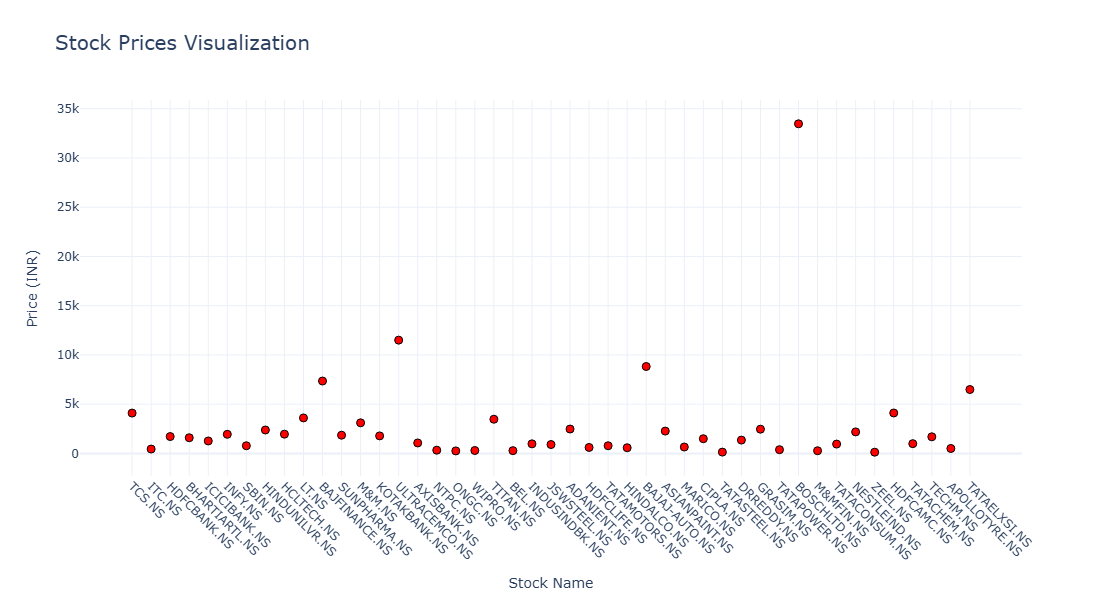

In [58]:
import plotly.express as px

fig = px.scatter(scatter_data,x="Stock",y="Price",
                 hover_name="Stock",
                 title="Stock Prices Visualization",
                 labels={'Price': 'Price (INR)', 'Stock': 'Stock Name'})

fig.update_traces(marker=dict(size=8, color='red', line=dict(width=1, color='black')), textposition='top center')

fig.update_layout(
    width=1100, 
    height=600,
    xaxis=dict(tickangle=45, title='Stock Name'),
    yaxis=dict(title='Price (INR)'),
    template='plotly_white',
    title_font=dict(size=20)
)

fig.show()


In [59]:
plt.plot(x=df["Date"],y=df["TCS.NS"],title="TCS Sock Chart")
plt.show()

KeyError: 'Date'

In [60]:
if 'Date' not in df.columns:
    df.reset_index(inplace=True)  # Reset index if dates are indices
    df.rename(columns={df.columns[0]: 'Date'}, inplace=True)  # Rename the index column to 'Date'

# Ensure 'Date' column is in datetime format
df['Date'] = pd.to_datetime(df['Date'])


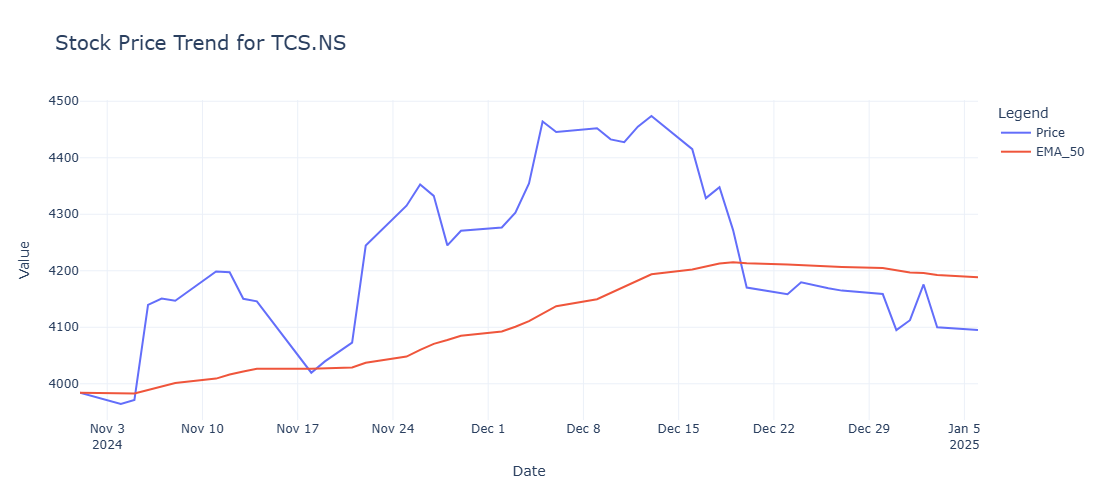

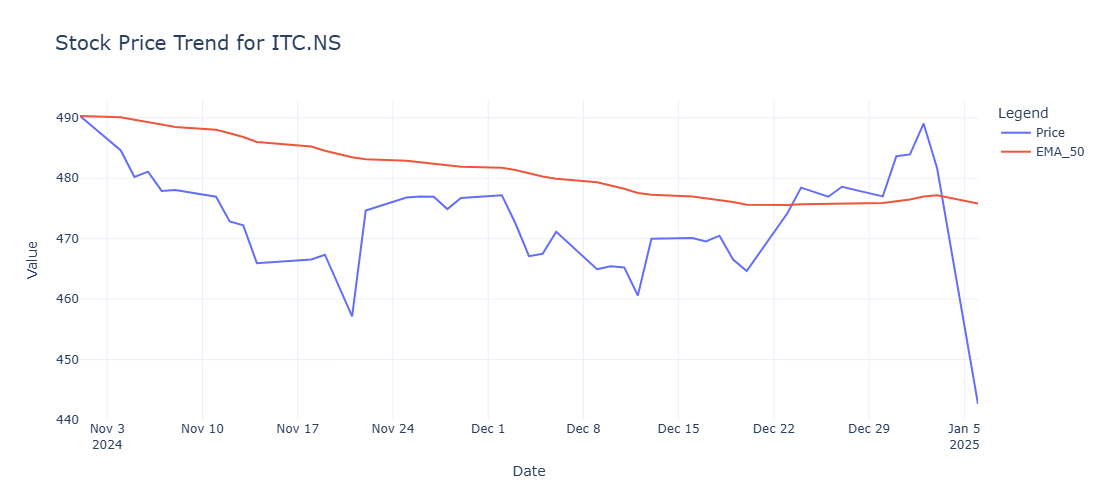

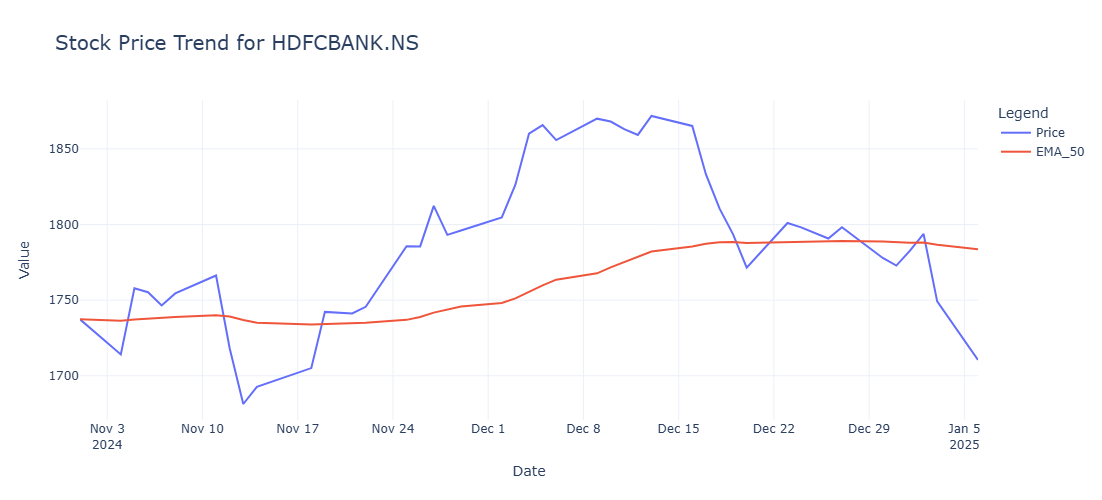

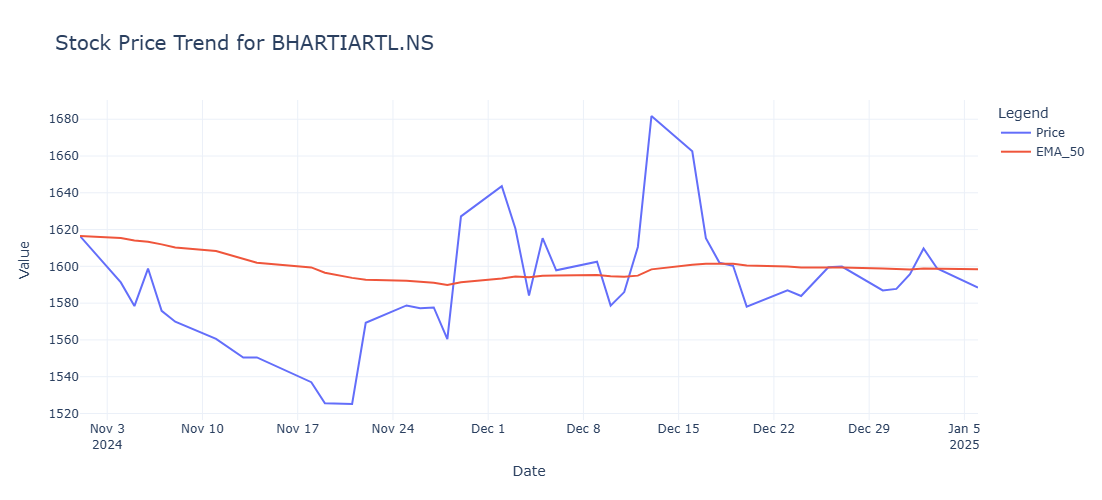

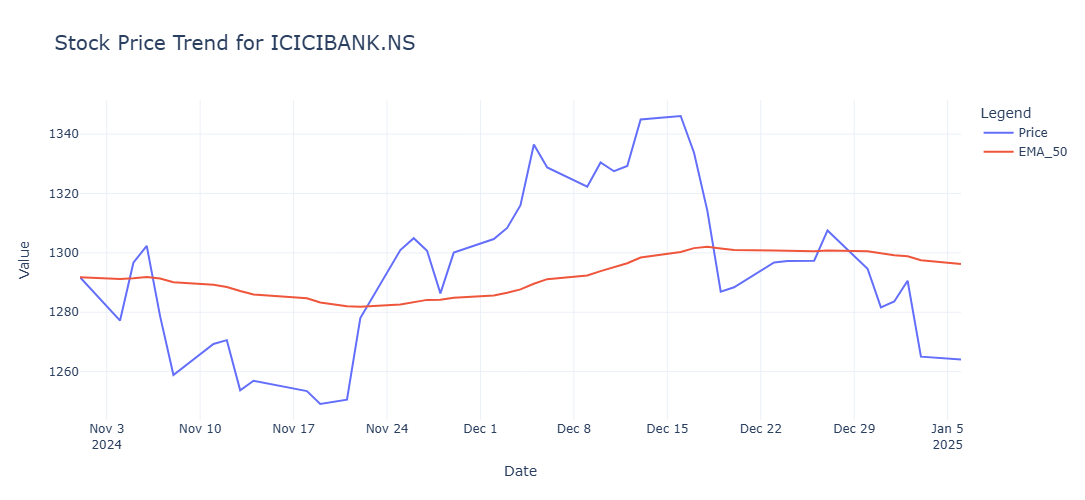

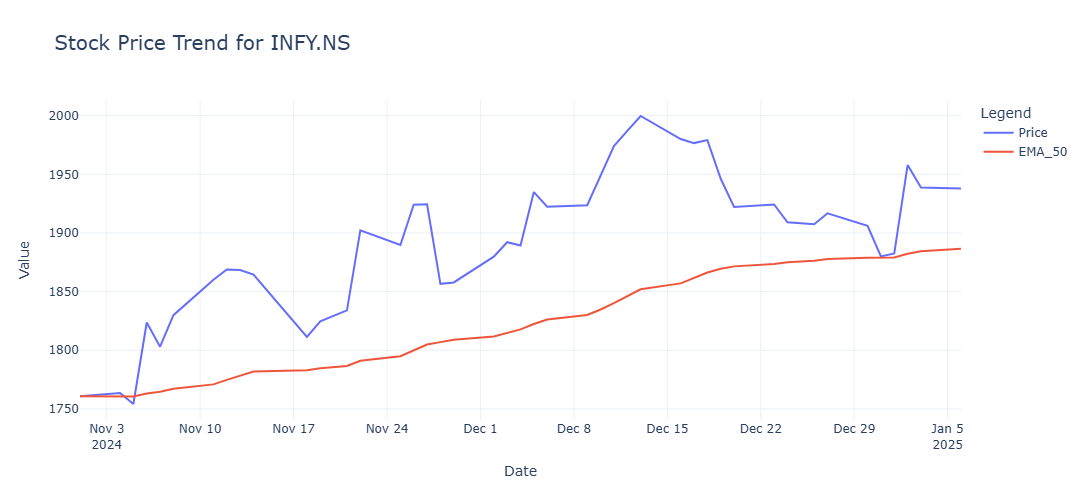

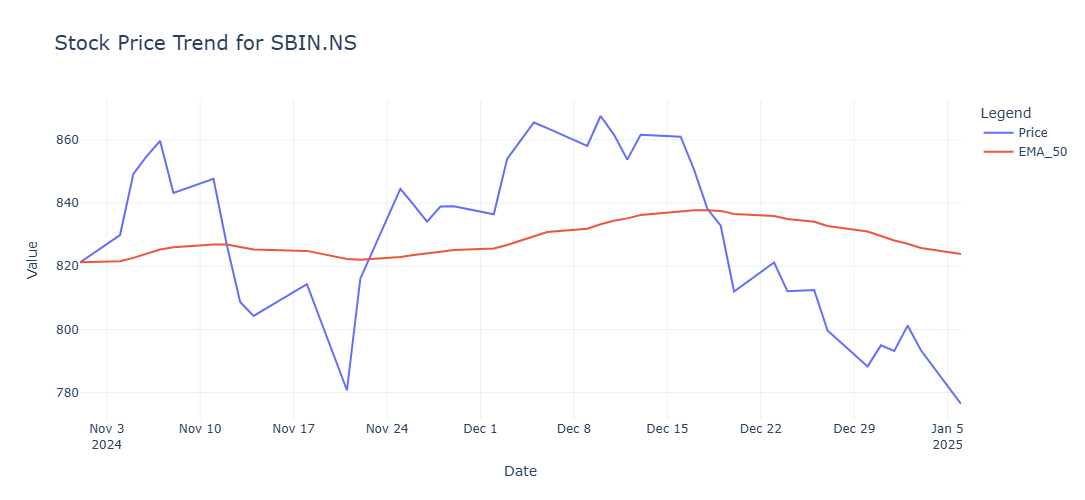

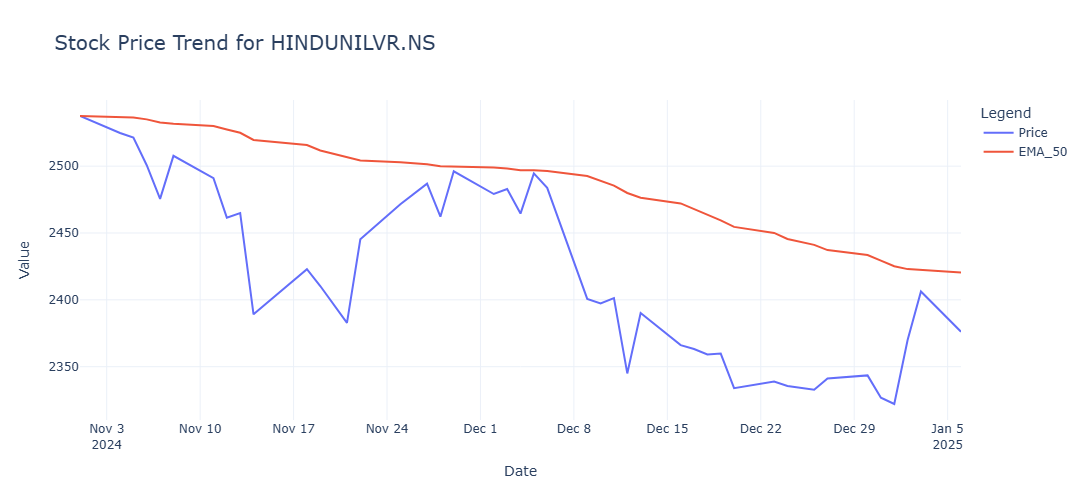

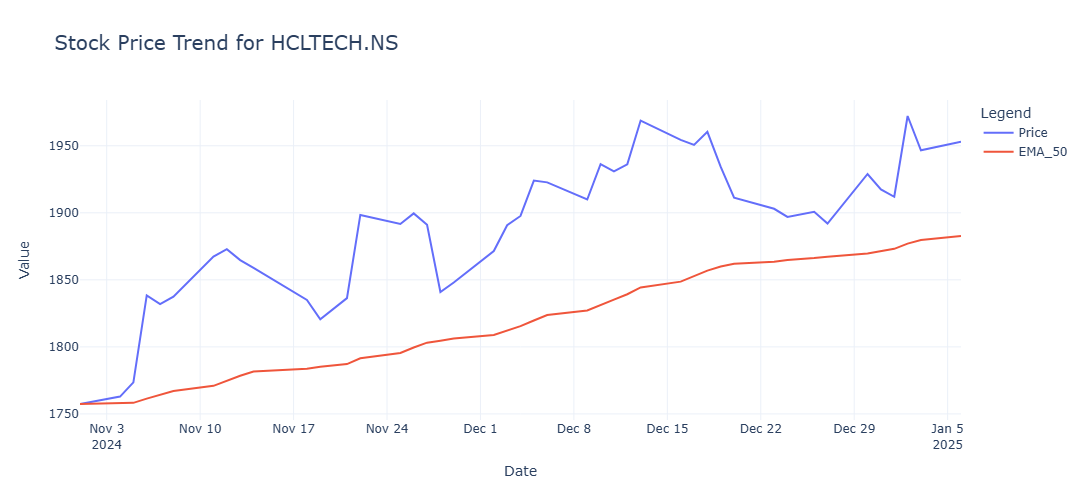

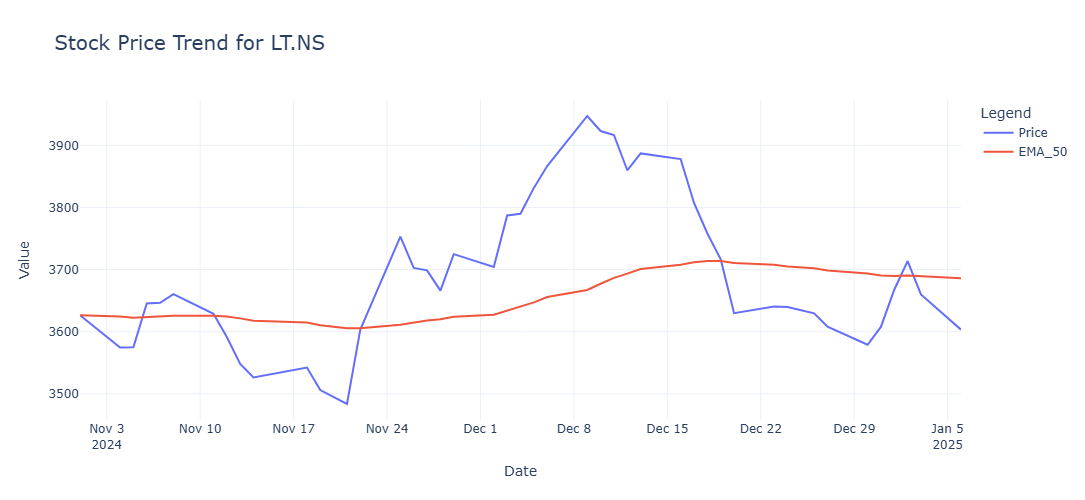

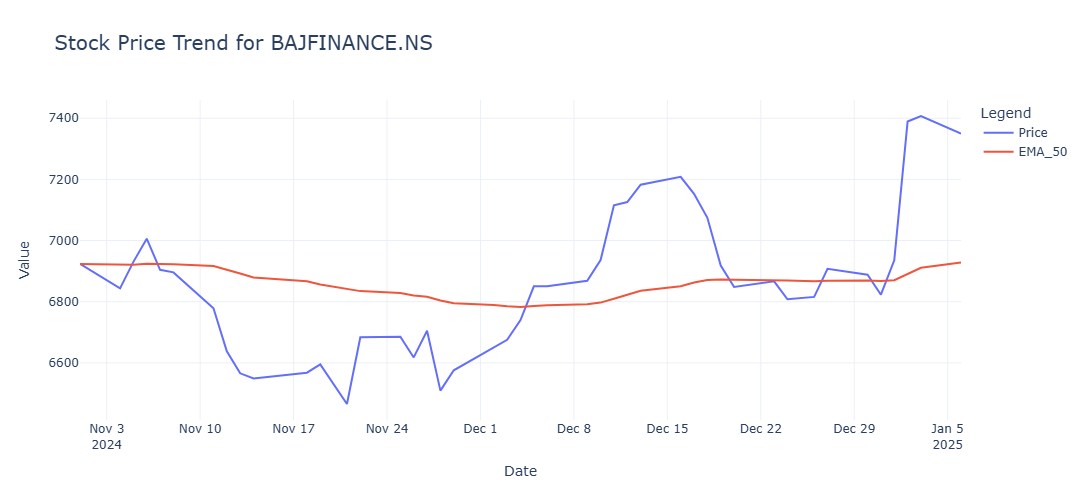

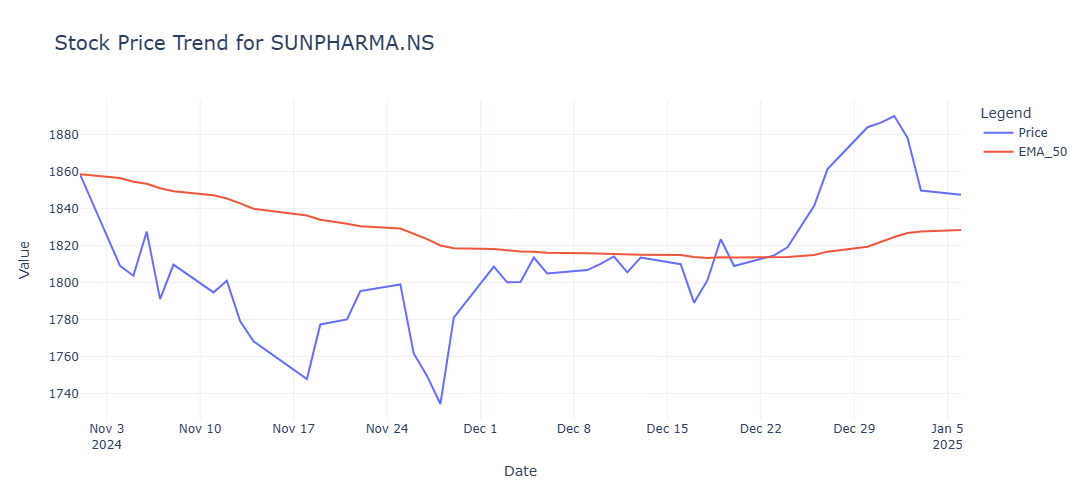

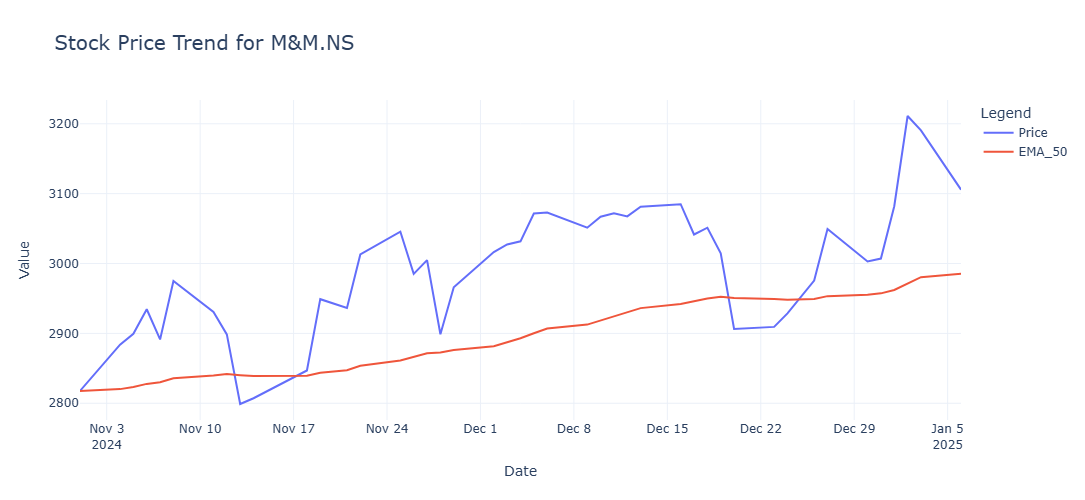

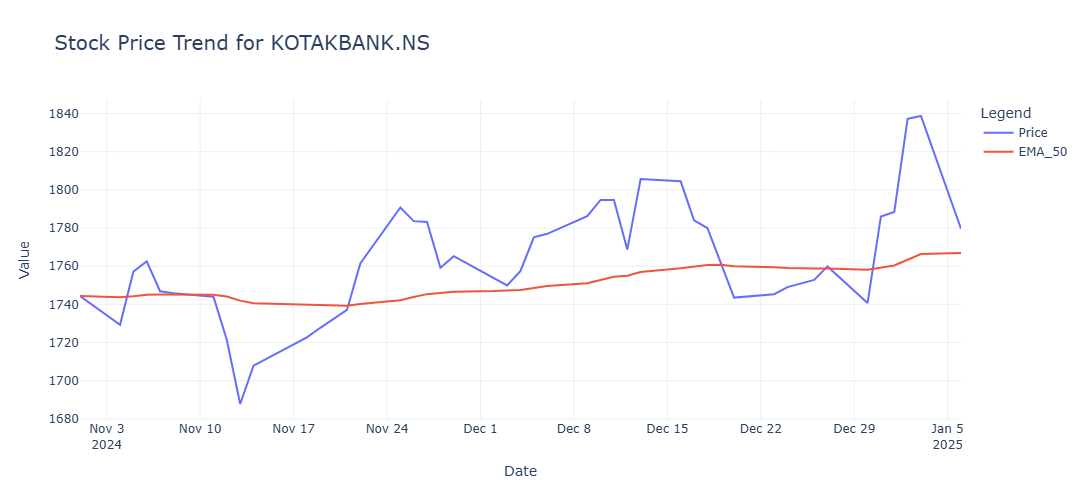

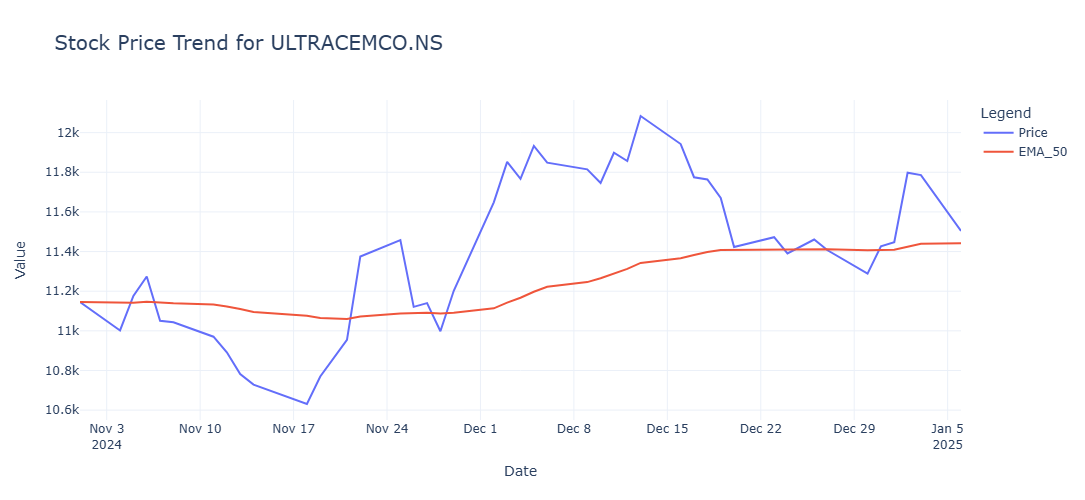

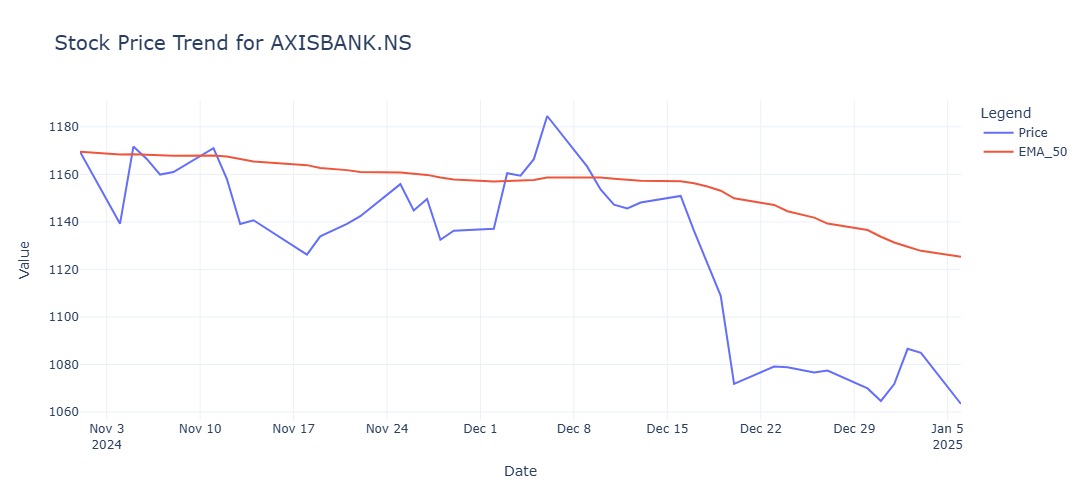

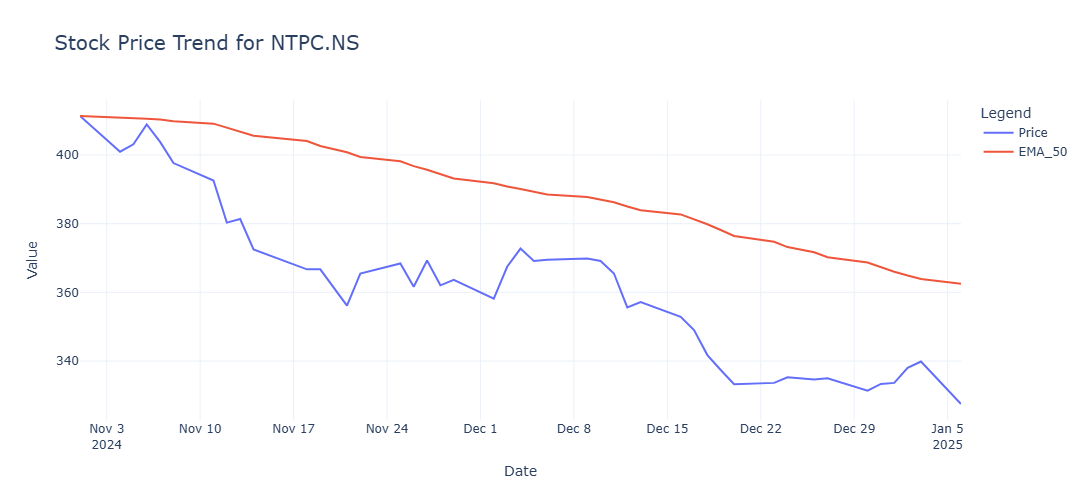

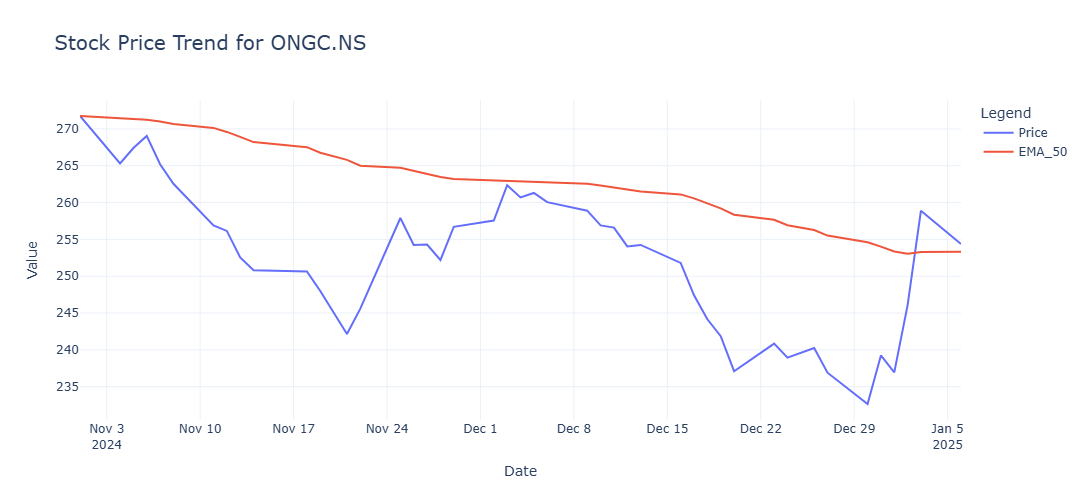

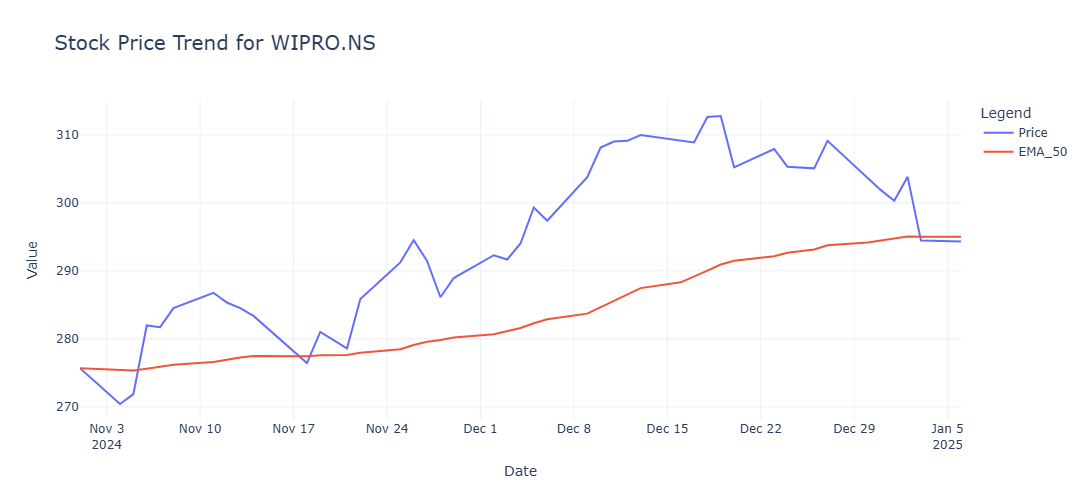

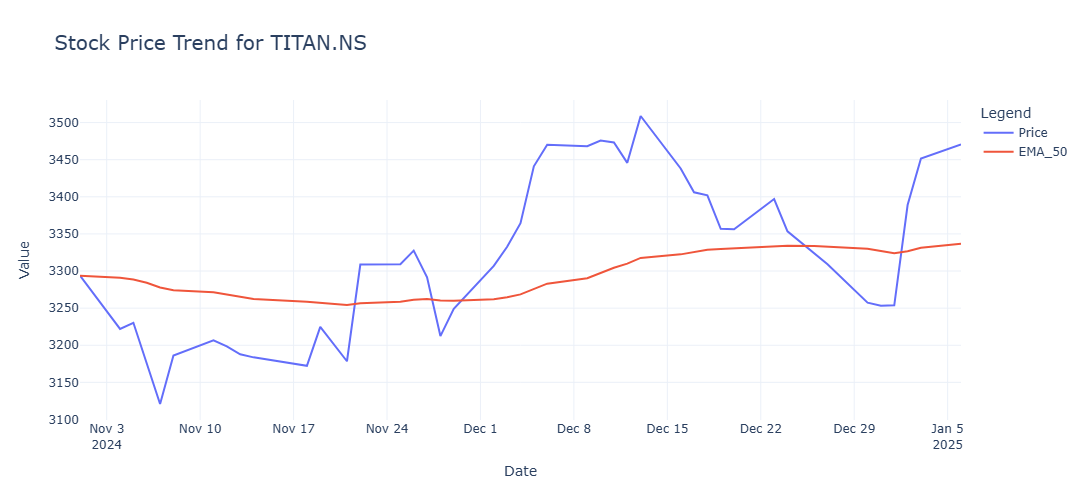

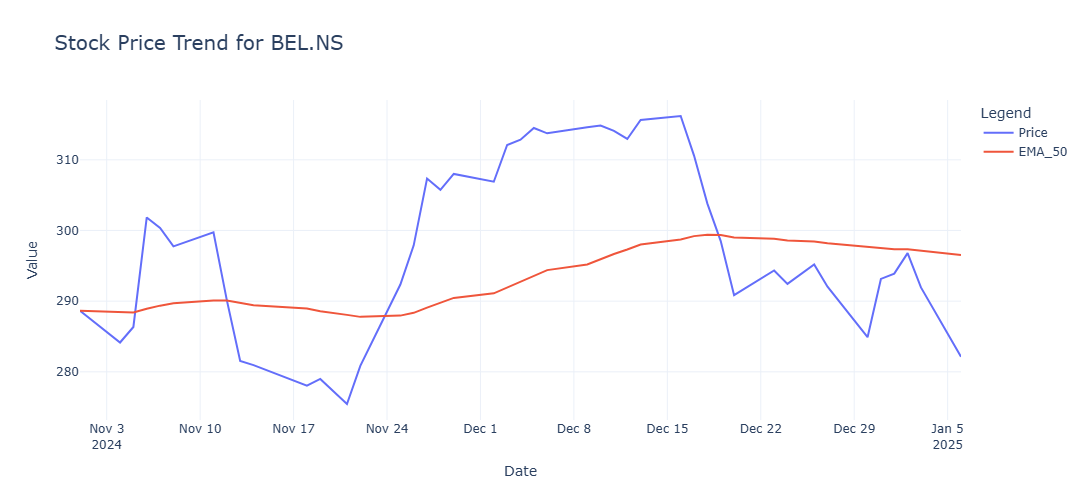

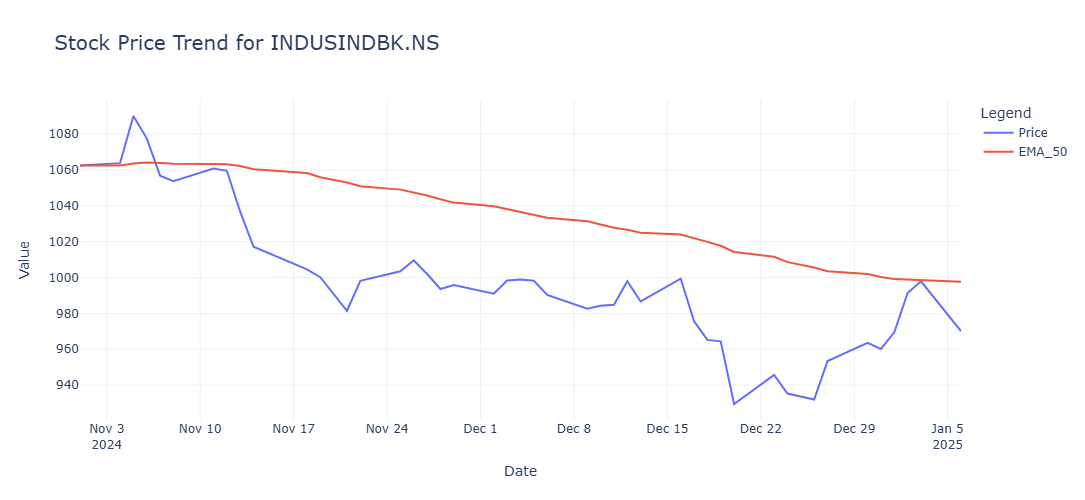

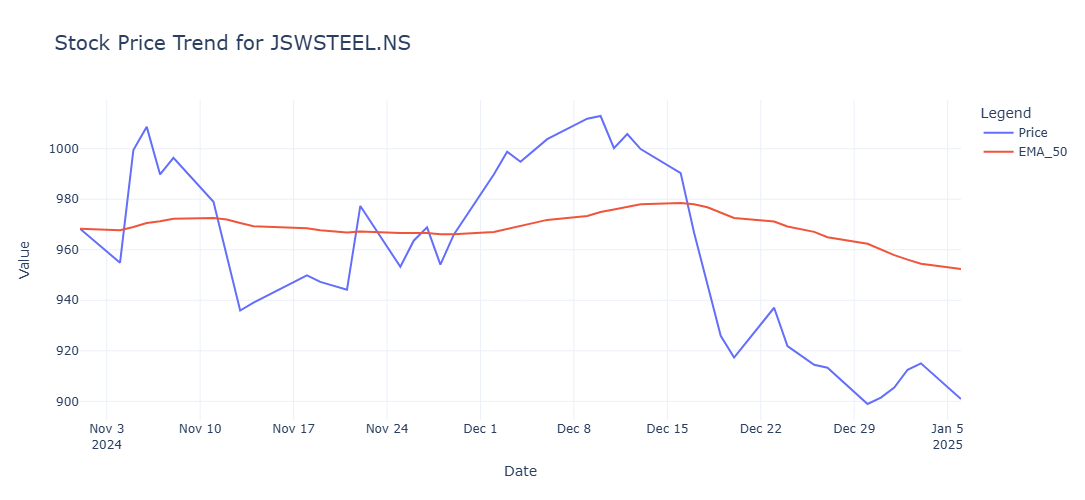

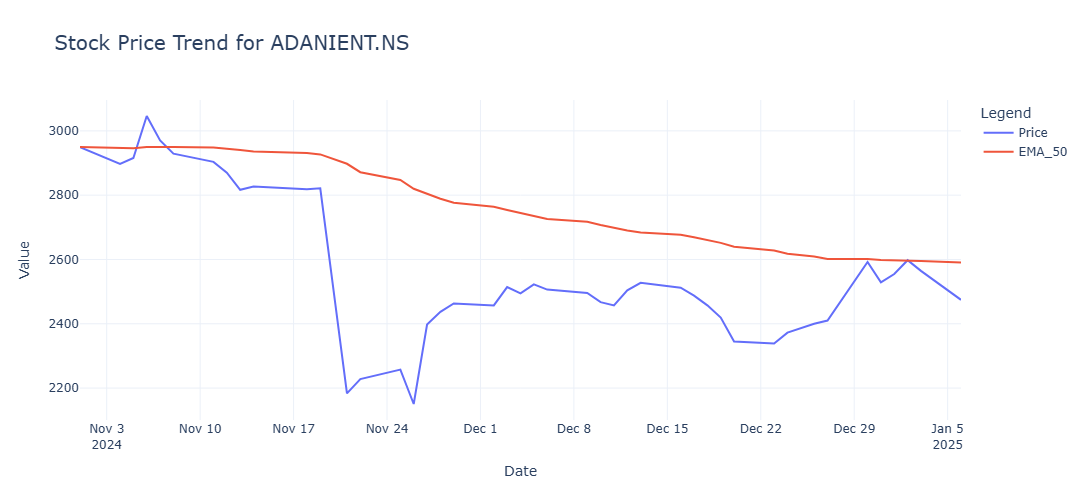

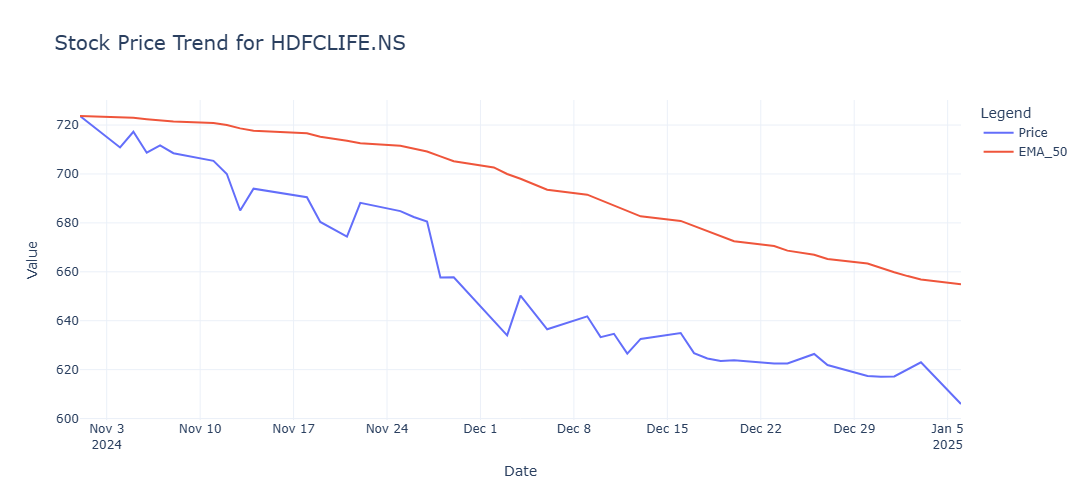

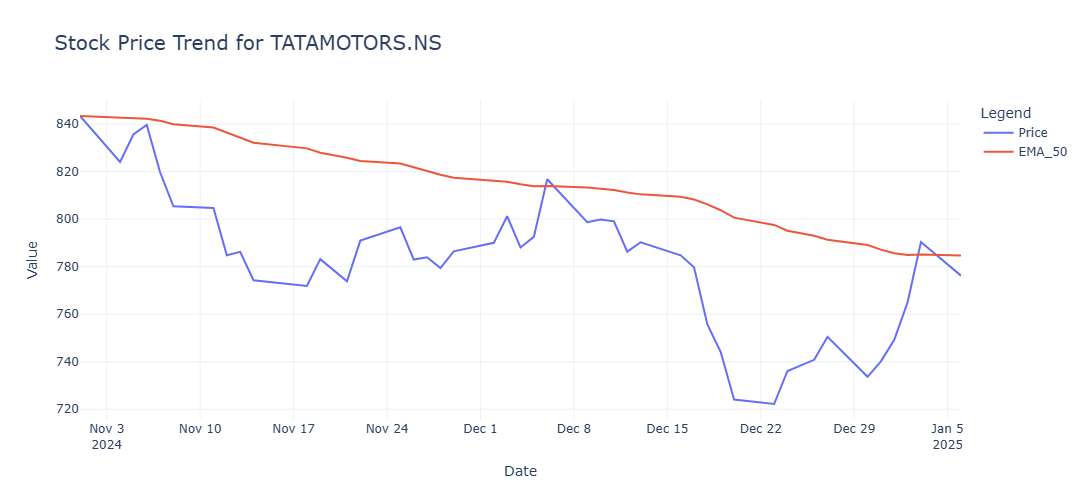

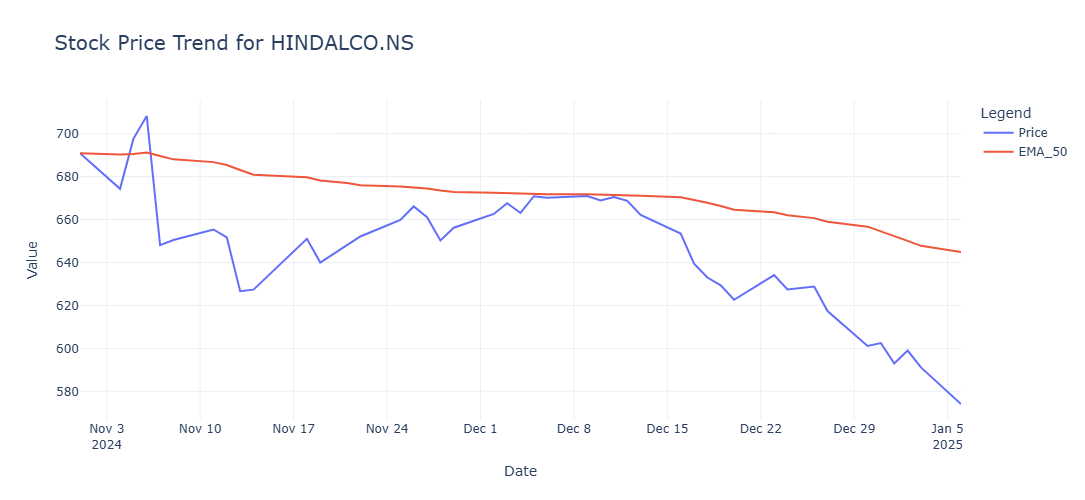

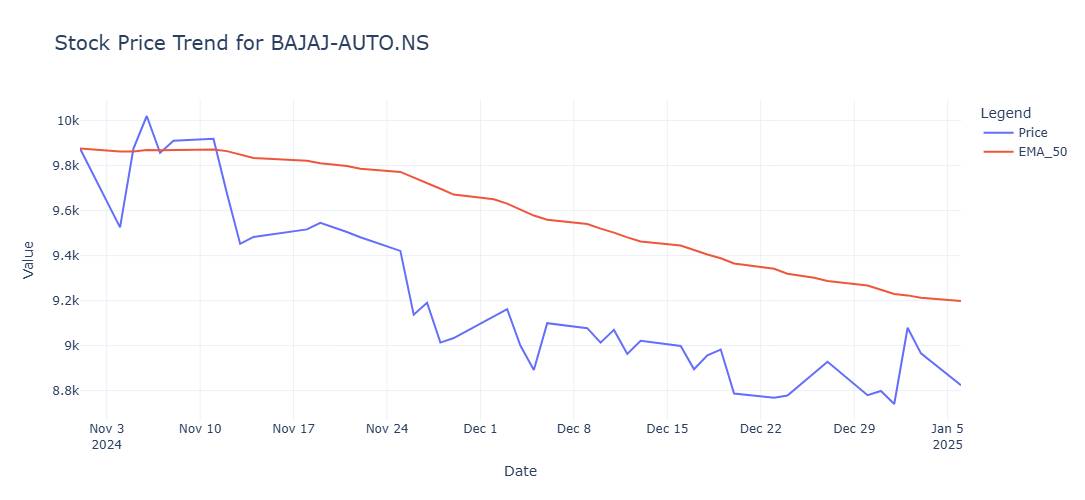

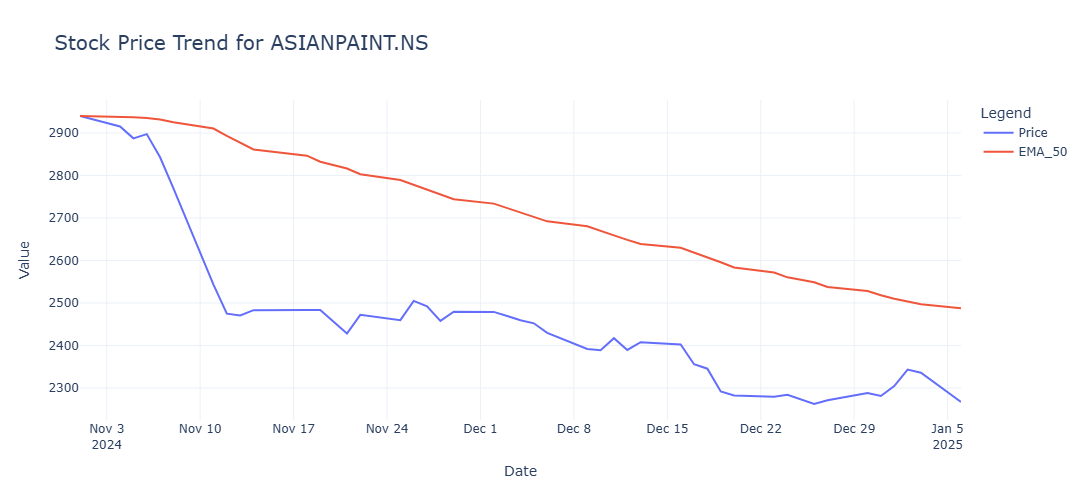

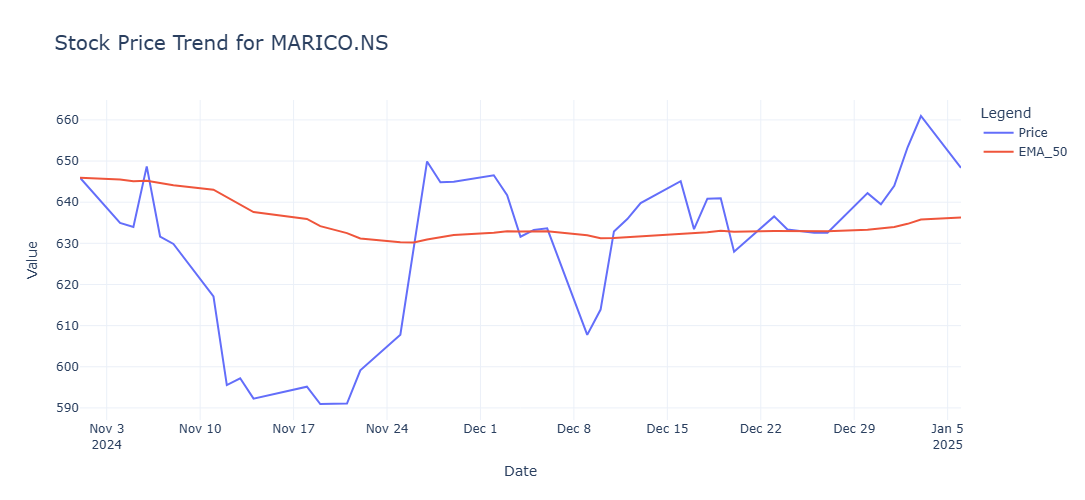

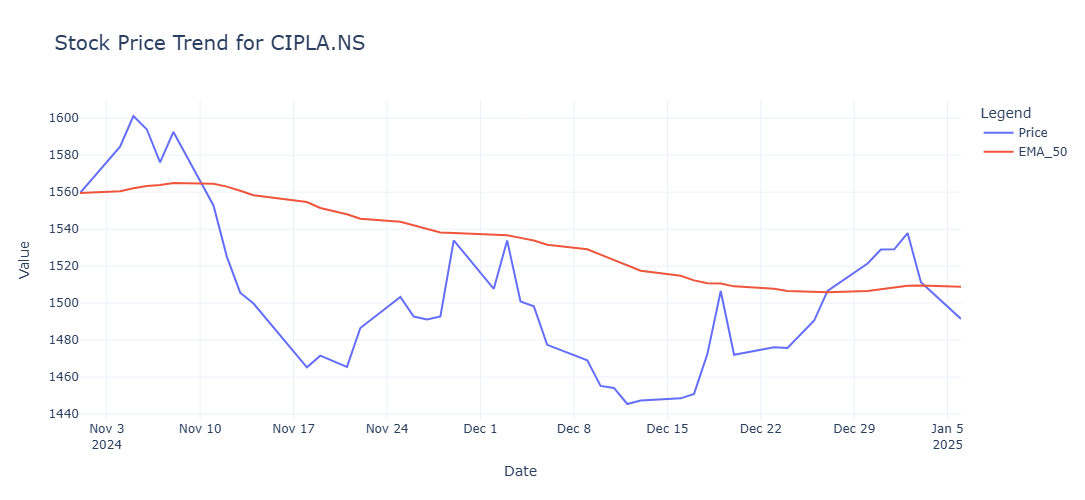

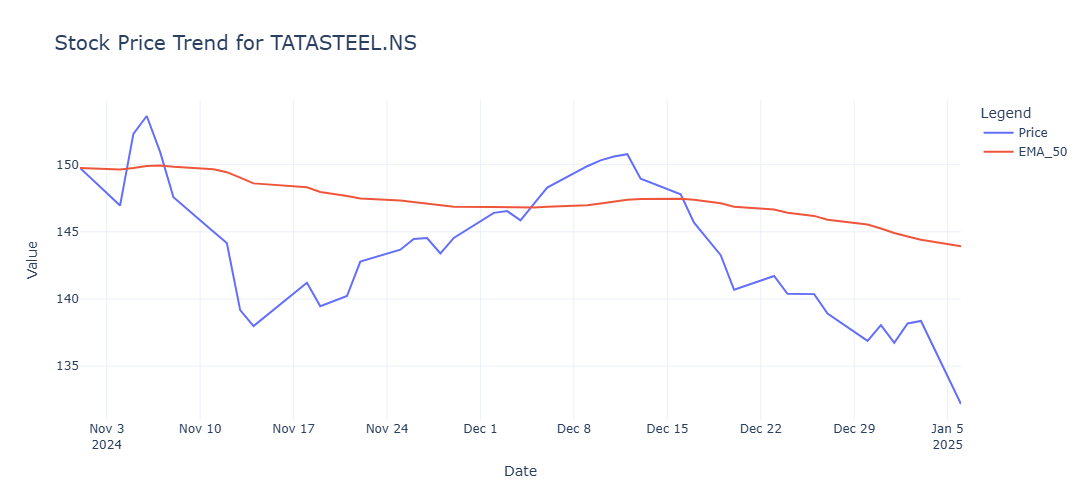

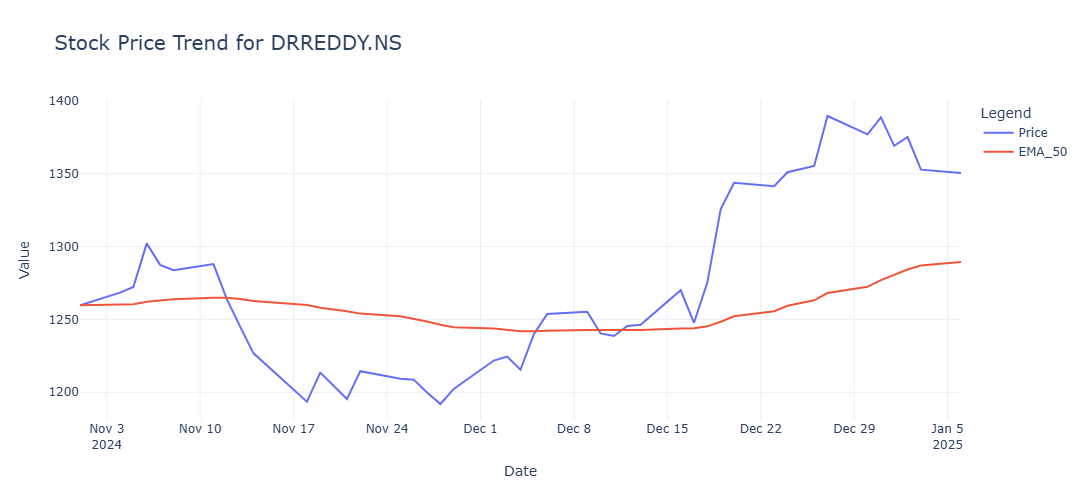

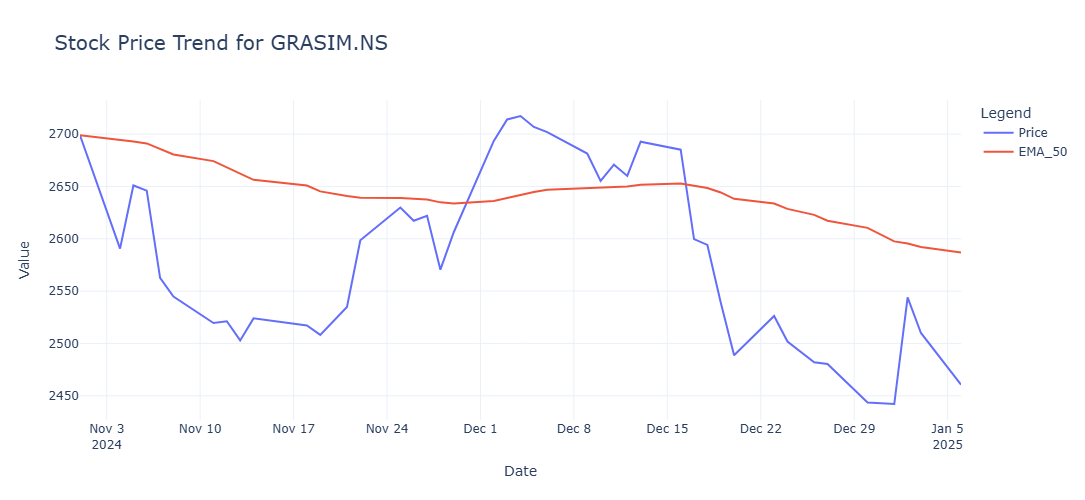

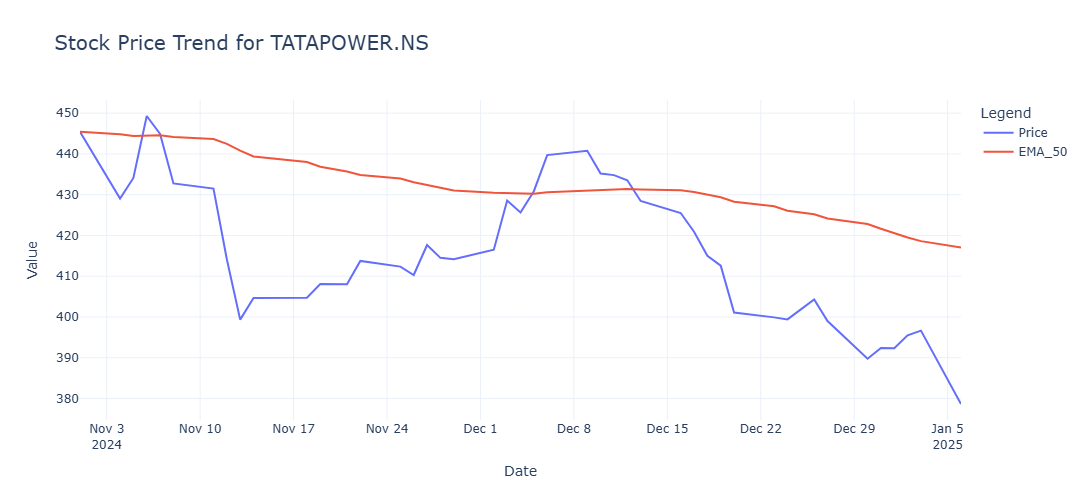

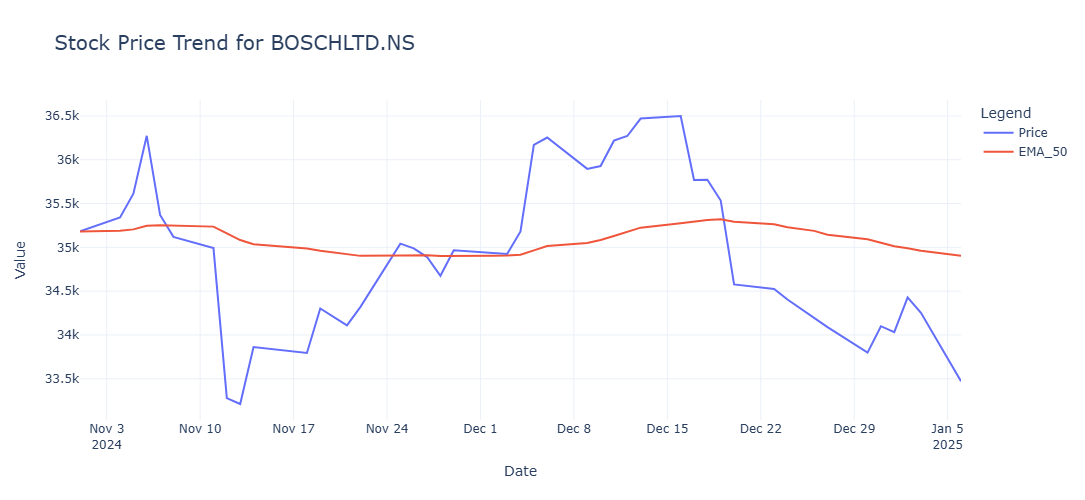

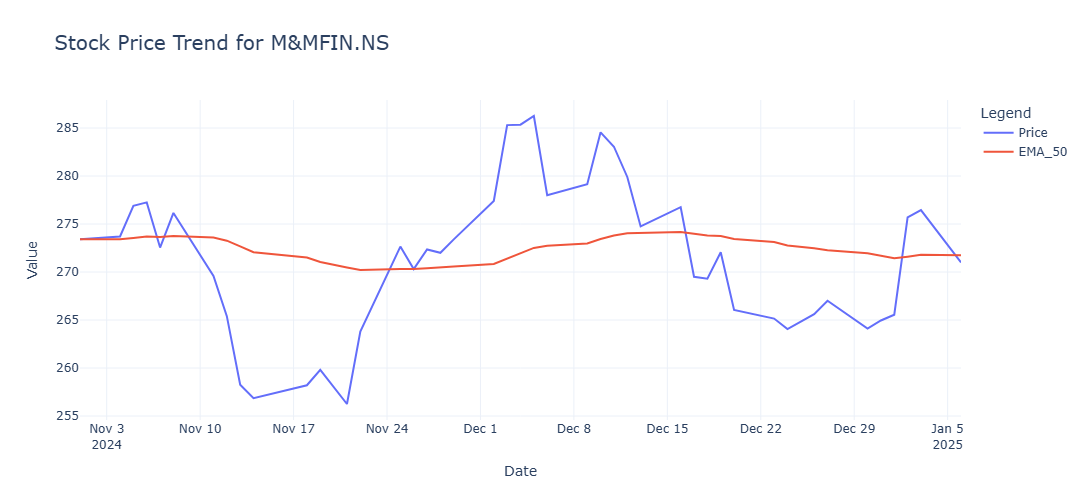

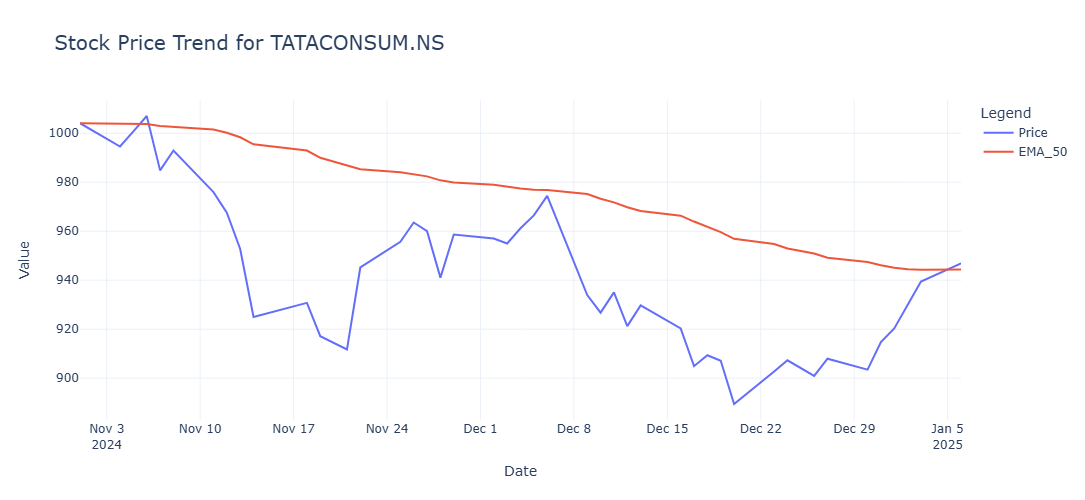

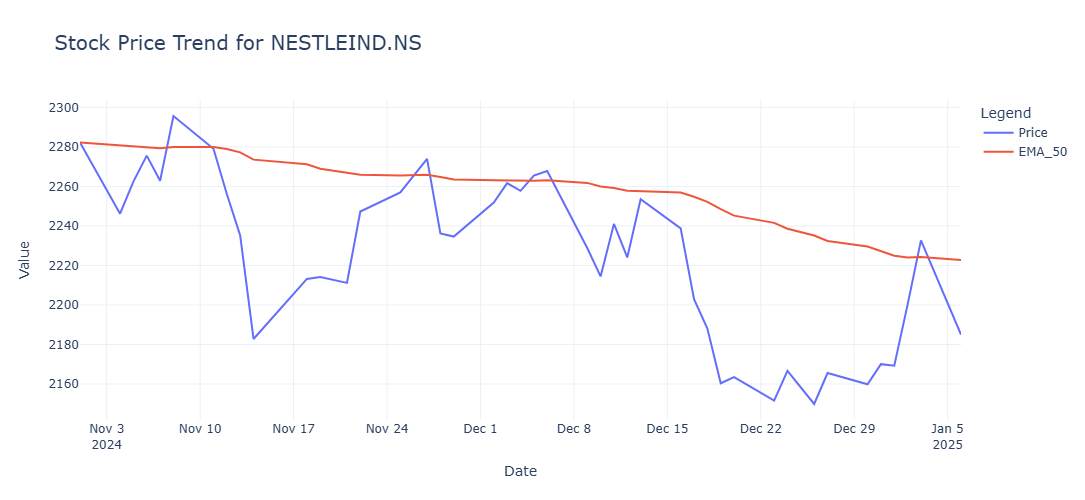

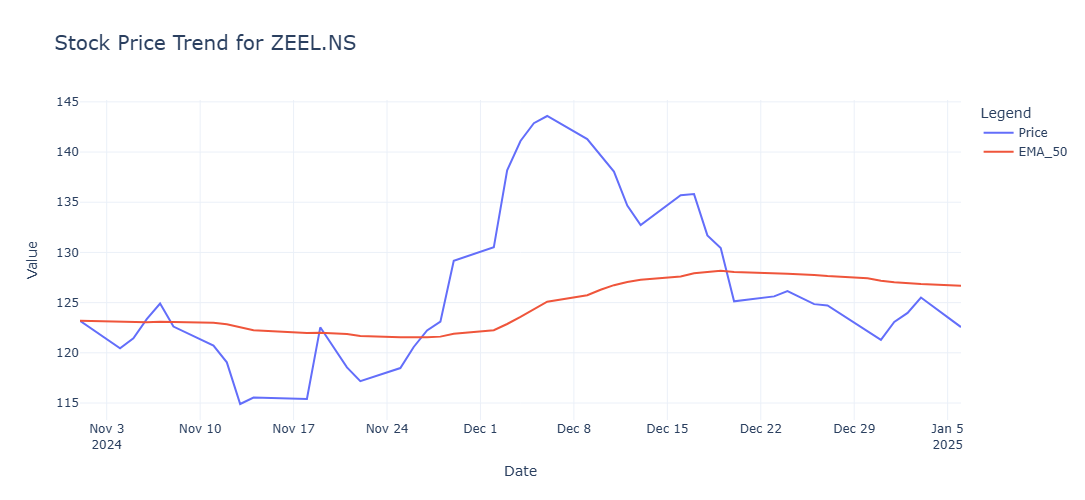

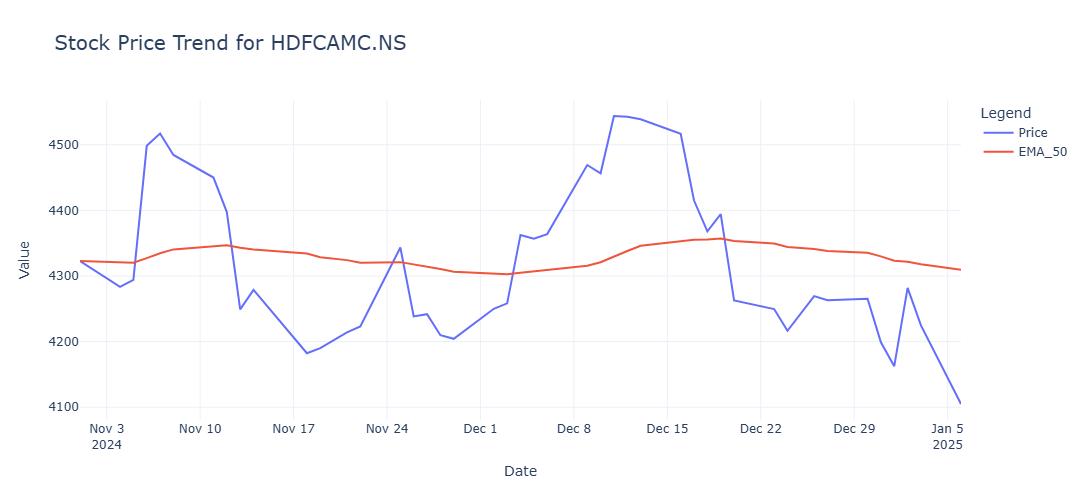

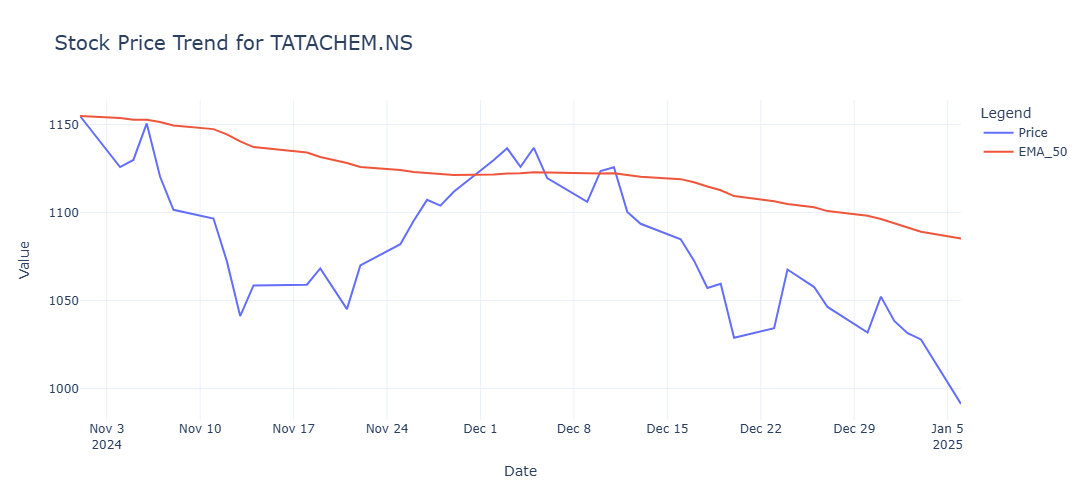

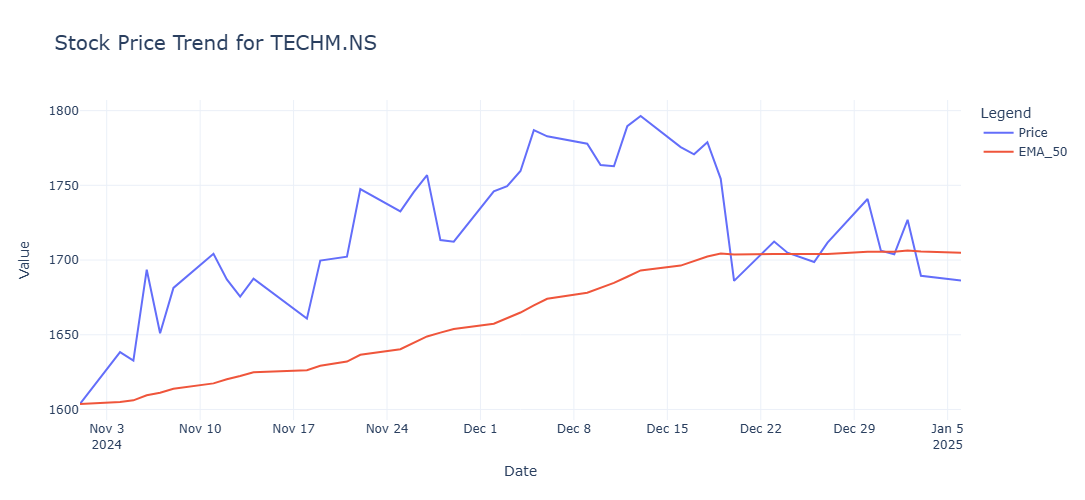

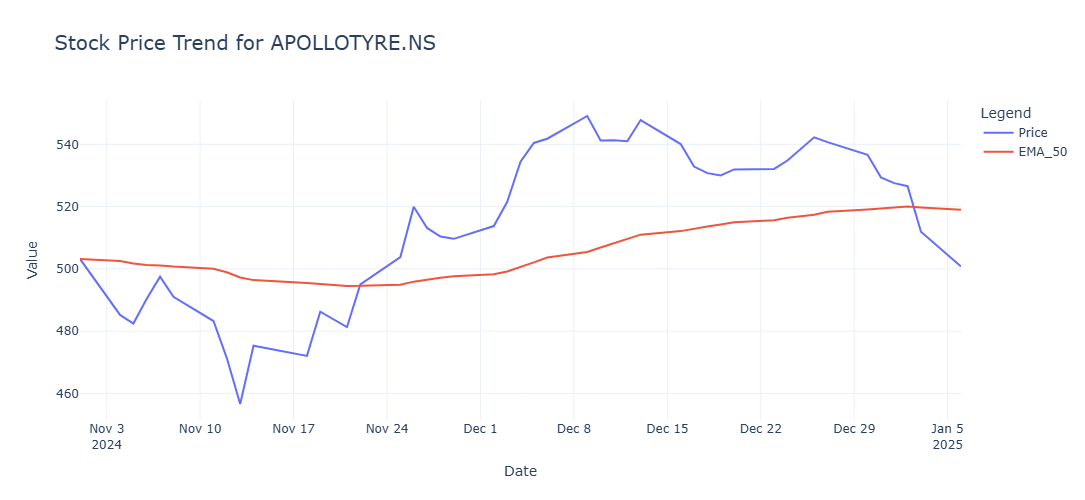

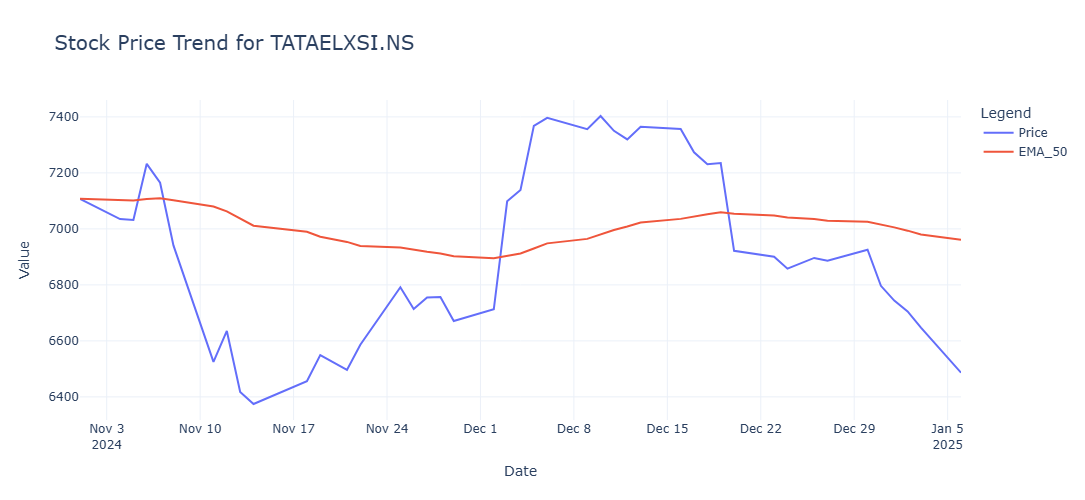

In [73]:
# Filter for the selected stock (e.g., "TCS.NS")
for col in df.columns[1:]:
   selected_stock = col
   line_data = df[['Date', selected_stock]].rename(columns={selected_stock: 'Price'})

   # Calculate the 50-day Exponential Moving Average (EMA)
   line_data['EMA_50'] = line_data['Price'].ewm(span=50, adjust=False).mean()

   # Melt the data for Plotly to plot both Price and EMA on the same chart
   melted_data = line_data.melt(id_vars='Date', value_vars=['Price', 'EMA_50'], 
                             var_name='Metric', value_name='Value')

   # Create the line chart
   fig = px.line(
      melted_data,
      x='Date',
      y='Value',
      color='Metric',
      title=f"Stock Price Trend for {selected_stock}",
      labels={'Date': 'Date', 'Price': 'Price (INR)','Metric': 'Type'},
      )

   # Customize layout
   fig.update_layout(
      width=1000,
      height=500,
      template='plotly_white',
      title_font=dict(size=20),
      legend=dict(title="Legend")
       )

   # Show the plot
   fig.show()